In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [2]:
##---------------DATOS DE ENTRENAMIENTO -------------------------##
##Cargar los datos con extención .mat
x = loadmat('/DatosPrueba4.mat')

##Traernos los datos del archivo .mat que nos interesan
y = x['data_tr']

##Convertir los datos en un array de Numpy
z = np.array(y)

##Convertir el Array en un DataFrame de Pandas
df = pd.DataFrame(z)

##Contar el numero de datos nulos del dataFrame
np.count_nonzero(pd.isnull(df) == True)

df.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','Label']
df.sample(8)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Label
603,0.000317,0.000685,0.000130,0.000070,3.302963,9.636801,0.002996,0.000000,0.000752,86.32,35.630789,62.0,0.0000,0.760196,-1.436164,138.0,62.0,93.316665,1.0
108,0.001696,0.002378,0.000787,0.000162,3.586914,14.117009,0.015449,0.000166,0.002911,1477.83,327.078684,1596.0,0.0000,-2.889214,6.724629,1596.0,345.0,1513.238967,0.0
164,0.000198,0.000339,0.000006,0.000008,1.832635,1.752867,0.001083,0.000000,0.000391,114.41,38.153093,138.0,0.0000,-0.605555,-1.557830,153.0,62.0,120.543561,1.0
777,0.000555,0.000973,0.000153,0.000108,1.803103,1.319906,0.002903,0.000005,0.001116,83.28,34.295825,62.0,0.0000,0.965295,-1.078693,138.0,62.0,90.000000,1.0
261,0.236044,0.974143,0.000440,0.000404,6.170270,42.276939,8.034434,0.000113,0.997588,1041.43,515.098427,1476.0,0.0000,-0.532312,-1.491937,1476.0,222.0,1160.710804,0.0
690,0.122675,0.541821,0.000468,0.000512,7.055313,56.277475,4.858796,0.000101,0.552887,792.84,673.539958,364.0,201.6336,0.449435,-1.779006,1646.0,228.0,1038.130425,0.0
676,0.000189,0.000376,0.000010,0.000010,2.436328,4.366542,0.001328,0.000003,0.000419,111.96,40.782230,138.0,29.6520,-0.346082,-1.757802,158.0,62.0,119.086523,1.0
254,0.047671,0.356517,0.000980,0.000013,8.955589,82.313842,3.472160,0.000143,0.357919,1299.22,357.642013,1428.0,0.0000,-2.454662,4.263882,1428.0,222.0,1347.071394,0.0


In [3]:
YEntrenamiento = df['Label']
XEntrenamiento = scaler.fit_transform(df.drop(['Label'],axis=1))

In [4]:
!pip install scikit-plot

In [12]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
import scikitplot as skplt 
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [13]:
def experimentar(X,Y,oversampling=False):
    Folds = 10
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for j, (train, test) in enumerate(skf.split(X, Y)):
        Xtrain= X[train,:]
        Ytrain = Y[train]
        Xtest = X[test, :]
        Ytest = Y[test]
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.7, store_covariance=True,
                              tol=0.0001)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        model.fit(X=Xtrain, y=Ytrain)
        Yest = model.predict_proba(Xtest)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        58
         1.0       0.92      1.00      0.96        48

    accuracy                           0.96       106
   macro avg       0.96      0.97      0.96       106
weighted avg       0.97      0.96      0.96       106



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.999472,0.001583,0.959037,0.018812


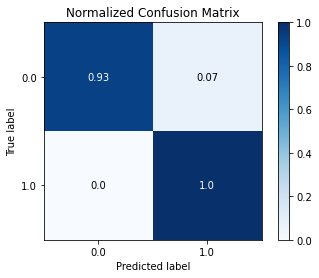

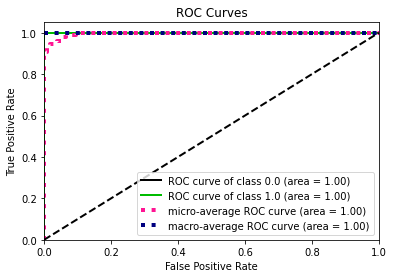

In [14]:
experimentar(XEntrenamiento,YEntrenamiento,False)